# SW2ALA-01 Anvendt lineær algebra eksamen
__Date__: 8th of June 2021  
__Student__: Felix Blix Everberg  
__au ID__: au482985  
__Student number__: 201371008  
All calculations are done using sagemath ([www.sagemath.org](https://www.sagemath.org)) in a jupyter notebook, with the source code included.  


## Preamble
The below code is defined as a utility to simplify the solutions

In [1]:
import traceback
def show_var(*names, approx=True, debug=False):
    if len(names) == 0:
        # First extract the line of source code where this was called
        source = traceback.extract_stack(limit=2)[0].line
        # Check if call was from a line starting with an assignment:
        if source.count('=') < 1:
            raise SyntaxError('The show_var() function can only be used on lines where a variable is assigned')
        # Then extract the variable name assigned to
        names = [name.strip() for name in source.split('=')[0].split(',')]
    for name in names:
        value = globals()[name]
        expr = LatexExpr(f'\\text{{{name}}} = ') + latex(value)
        if approx:
            try:
                approx = n(value, digits=3)
                if value != approx:
                    expr += LatexExpr(f'\\sim') + latex(approx)
                elif parent(value) is QQ and not _can_convert_to_ZZ(value):
                    expr += LatexExpr(f'= {RR(approx).str(truncate=True, skip_zeroes=True)}')
                elif value.base_ring() is QQ and not _can_convert_to_ZZ(value):
                    expr += LatexExpr('=') + latex(approx)
            except Exception as e:
                if debug:
                    traceback.print_exc()
        show(expr)

<div style="page-break-after: always;"></div>

## Problem 1

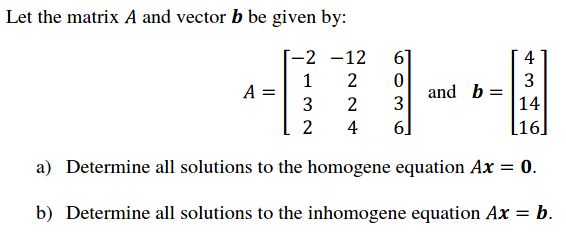

### a)

Since the general homogeneous solution is part of the inhomogeneous solution, _b)_ will be solved first, and the answer extracted from that solution

Looking at the result from below, it can be concluded that A has full rank, and thus __only the trivial solution $\boldsymbol x = \boldsymbol 0$ exists.__

### b)

In order to solve to inhomogeneous equation, the augmented matrix $\left(A\vert \boldsymbol b\right)$ is created reduced to echelon form

In [2]:
A = Matrix(4, 3, [-2, -12, 6, 1, 2, 0, 3, 2, 3, 2, 4, 6])
b = vector([4, 3, 14, 16])
A_aug_b = A.augment(b, subdivide=True); show_var()
A_aug_b_rref = A_aug_b.rref(); show_var()

\text{A_aug_b} = \left(\begin{array}{rrr|r}
-2 & -12 & 6 & 4 \\
1 & 2 & 0 & 3 \\
3 & 2 & 3 & 14 \\
2 & 4 & 6 & 16
\end{array}\right)

\text{A_aug_b_rref} = \left(\begin{array}{rrr|r}
1 & 0 & 0 & 3 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & \frac{5}{3} \\
0 & 0 & 0 & 0
\end{array}\right)

Since the matrix A has full rank, a single solution exists which is  
$\boldsymbol x = \begin{bmatrix} 3 \\ 0 \\ 1.67 \end{bmatrix}$

## Problem 2

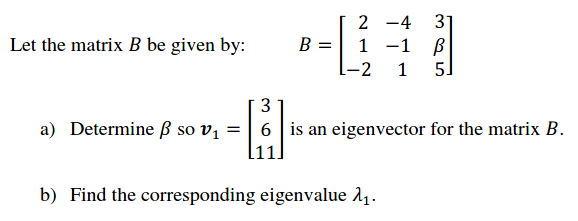

### a)

In order to calculate this, first the product $B\boldsymbol v_1$ is calculated algebraically

In [3]:
var('beta')
B = Matrix(SR, 3, 3, [2, -4, 3, 1, -1, beta, -2, 1, 5])
v_1 = vector([3, 6, 11])
Bv_1 = B*v_1; show_var()

\text{Bv_1} = \left(15,\,11 \, \beta - 3,\,55\right)

For $\boldsymbol v_1$ to be an eigenvector it must fulfill $B\boldsymbol v_1 = \lambda \boldsymbol v_1$ for some eigenvalue $\lambda$. Using this expression above, this yields the equation  
$ \begin{bmatrix} 15 \\ 11\beta - 3 \\ 55 \end{bmatrix} = \begin{bmatrix} 3\lambda \\ 6\lambda \\ 11\lambda \end{bmatrix} $  
meaning that if $11 \beta − 3 = 6 \lambda \Leftrightarrow \beta = \frac{6 \lambda + 3}{11}$, then $\boldsymbol v_1$ is an eigenvector of $B$

### b)

solving either the first or last equation it is clear that __the eigenvalue for which $\boldsymbol v_1$ is an eigenvector is 5__ ($\lambda =  \frac{15}{3}$). substituting this into the equation for $\beta$, you get $\beta = 3$

## Problem 3

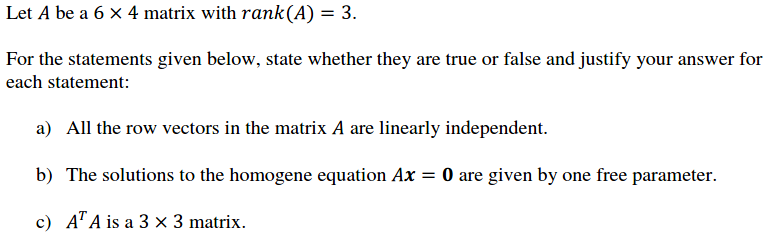

### a)

__False__  
Since the dimension of the row space is equal to the rank for a given matrix, there can be at most 3 linearly independent rows in A

### b)

__True__  
since by the rank theorem (theorem 14 of chapter 2 in Linear Algebra and Its Applications by David C. Lay), if A has n columns then dim Nul A = n - rank A. Since A has four columns and rank three, this means there must be one free variable.

### c)

__False__  
It is a 4 x 4 matrix, since it would mean multiplying a 4x6 matrix with a 6x4 matrix

## Problem 4

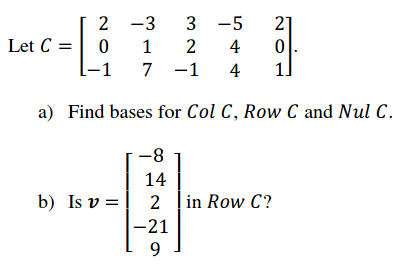

### a)

Firstly the pivot columns are determined by row reducing $C$ to echelon form

In [4]:
C = Matrix(3, 5, [2, -3, 3, -5, 2, 0, 1, 2, 4, 0, -1, 7, -1, 4, 1])
C_rref = C.rref(); show_var()

\text{C_rref} = \left(\begin{array}{rrrrr}
1 & 0 & 0 & -\frac{37}{7} & \frac{13}{7} \\
0 & 1 & 0 & \frac{2}{21} & \frac{8}{21} \\
0 & 0 & 1 & \frac{41}{21} & -\frac{4}{21}
\end{array}\right)

Since the first three columns have pivots, these columns are used to form a basis for the columns space:  
$\text{Col }C = \text{Span}\left\{ \begin{bmatrix} 2 \\ 0 \\ -1 \end{bmatrix}, 
                                   \begin{bmatrix} -3 \\ 1 \\ 7 \end{bmatrix}, 
                                   \begin{bmatrix} 3 \\ 2 \\ -1 \end{bmatrix} \right\}$

Similarly all three rows have pivots, and the row space can be formed accordingly:  
$\text{Row }C = \text{Span}\left\{ \begin{bmatrix} 2 \\ -3 \\ 3 \\ -5 \\ 2 \end{bmatrix},
                                   \begin{bmatrix} 0 \\ 1 \\ 2 \\ 4 \\ 0 \end{bmatrix},
                                   \begin{bmatrix} -1 \\ 7 \\ -1 \\ 4 \\ 1 \end{bmatrix} \right\}$

Since the matrix has 5 columns, and rank 3, the null space has dimension 2. Looking at the rref form of $C$ above, the solution is easily created with $\boldsymbol x_4$ and $\boldsymbol x_5$ as free variables.  
$\boldsymbol x = x_4 \begin{bmatrix} 37/7 \\ -2/21 \\ -41/21 \\ 1 \\ 0 \end{bmatrix} + x_5 \begin{bmatrix} -13/7 \\ -8/21 \\ 4/21 \\ 0 \\ 1 \end{bmatrix}$  
meaning that  
$\text{Nul }C = \text{Span}\left\{ \begin{bmatrix} 37/7 \\ -2/21 \\ -41/21 \\ 1 \\ 0 \end{bmatrix},
                                   \begin{bmatrix} -13/7 \\ -8/21 \\ 4/21 \\ 0 \\ 1 \end{bmatrix} \right\}$

### b)

To check if $\boldsymbol v$ is in the row space of C, an augmented matrix is formed from the basis vectors of the row space and $\boldsymbol v$. This matrix is then row reduced to check if $\boldsymbol v$ is a linear combination of the preceding columns.  
Since the basis vectors for the row space are all rows of $C$, the matrix is easily formed as $\left(C^T\vert\boldsymbol v\right)$

In [5]:
v = vector([-8, 14, 2, -21, 9])
row_basis_aug_v_rref = C.T.augment(v, subdivide=True).rref(); show_var()

\text{row_basis_aug_v_rref} = \left(\begin{array}{rrr|r}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0
\end{array}\right)

Which clearly shows that $\boldsymbol v$ is not a linear combination of the rows of $C$, and this __$\boldsymbol v$ is not in the row space of $C$__.

## Problem 5

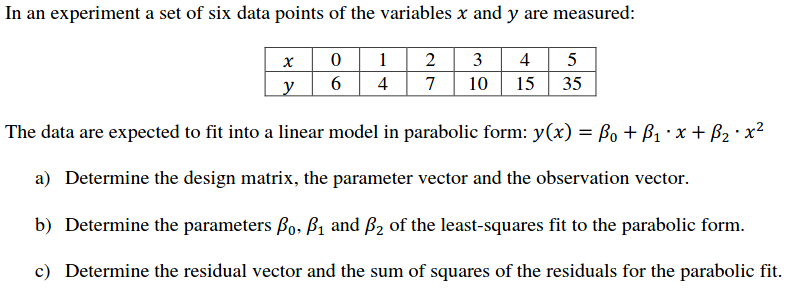

### a)

The matrix equation of the model is $X \boldsymbol \beta = \boldsymbol y$, where $X$ is the design matrix, $\boldsymbol \beta$ is the parameter vector and $\boldsymbol y$ is the observation vector. The design vector is constructed by applying model with the parameters divided out, to the first coordinates of the observations:  
$X = \begin{bmatrix} 1 & x_0 & x_0^2 \\ \dots \\ 1 & x_n & x_n^2 \end{bmatrix}$

In [6]:
var('beta_0, beta_1, beta_2')
data = Matrix([[i for i in range(6)], [6, 4, 7, 10, 15, 35]])
X = Matrix([[1, x, x^2] for x in data.row(0)]); show_var()
beta = vector([beta_0, beta_1, beta_2]); show_var()
y = data.row(1); show_var()

\text{X} = \left(\begin{array}{rrr}
1 & 0 & 0 \\
1 & 1 & 1 \\
1 & 2 & 4 \\
1 & 3 & 9 \\
1 & 4 & 16 \\
1 & 5 & 25
\end{array}\right)

\text{beta} = \left(\beta_{0},\,\beta_{1},\,\beta_{2}\right)

\text{y} = \left(6,\,4,\,7,\,10,\,15,\,35\right)

*Please note that sage displays vectors as row vectors.

### b)

The least squares solution is found using the pseudo inverse. if the design matrix has full rank, the pseudo inverse can be constructed as $\left(X^TX\right)^{-1}X^T$. Otherwise $X^TX$ isn't invertible. Using sage to calculate the pseudo inverse, as below is therefore only possible if X has full rank, or the call to inverse will fail, so the check is skipped.

In [7]:
X_pseudo_inv = (X.T*X).inverse()*X.T; show_var()
beta = X_pseudo_inv*y; show_var()

\text{X_pseudo_inv} = \left(\begin{array}{rrrrrr}
\frac{23}{28} & \frac{9}{28} & 0 & -\frac{1}{7} & -\frac{3}{28} & \frac{3}{28} \\
-\frac{33}{56} & \frac{1}{280} & \frac{23}{70} & \frac{27}{70} & \frac{7}{40} & -\frac{17}{56} \\
\frac{5}{56} & -\frac{1}{56} & -\frac{1}{14} & -\frac{1}{14} & -\frac{1}{56} & \frac{5}{56}
\end{array}\right)

\text{beta} = \left(\frac{97}{14},\,-\frac{751}{140},\,\frac{59}{28}\right)

And so __the parameters are $\beta_0 = 6.93$, $\beta_1 = -5.36$ and $\beta_2 = 2.11$__.

### c)

The residual vector is formed by subtracting the model prediction from the observed values

In [8]:
residuals = X*beta - y; show_var()

\text{residuals} = \left(\frac{13}{14},\,-\frac{23}{70},\,-\frac{83}{35},\,-\frac{1}{5},\,\frac{293}{70},\,-\frac{31}{14}\right)

In order to find the sum of squares, this vector is dotted with itself.

In [9]:
sum_of_squares = residuals.dot_product(residuals); show_var()

\text{sum_of_squares} = \frac{1017}{35}

## Problem 6

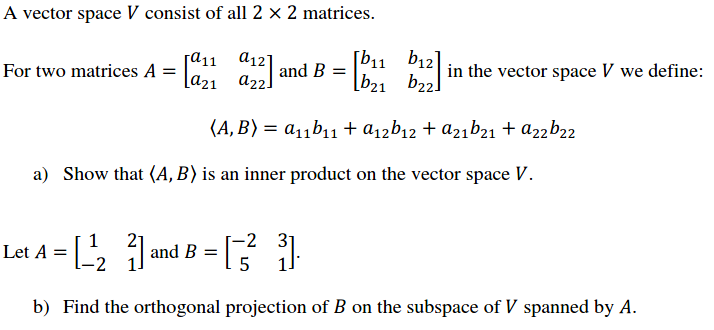

### a)

To show that the given function is an inner product on $V$, the four axioms of an inner product must be shown to be true. 

#### 1: $\langle \boldsymbol u, \boldsymbol v \rangle = \langle \boldsymbol v, \boldsymbol u \rangle$

To show this, consider the expression given above, with every $a_{ij}$ swapped for $b_{ij}$ and vice-versa. Since scalar multiplication is commutative, this would not alter the result, and the above function is commutative

#### 2: $\langle \boldsymbol u +  \boldsymbol v, \boldsymbol w \rangle = \langle \boldsymbol u, \boldsymbol w \rangle + \langle \boldsymbol u, \boldsymbol w \rangle$

This is most easily shown by expanding each side of the equation algebraically

In [10]:
var('u_11, u_12, u_21, u_22, v_11, v_12, v_21, v_22, w_11, w_12, w_21, w_22')
u = Matrix([[u_11, u_12],
            [u_21, u_22]])
v = Matrix([[v_11, v_12],
            [v_21, v_22]])
w = Matrix([[w_11, w_12],
            [w_21, w_22]])
def inner_product(u, v):
    assert u.nrows() == v.nrows() and u.ncols() == v.ncols()
    return sum([u[i,j]*v[i,j] for i in range(u.nrows()) for j in range(u.ncols())])
left = inner_product(u+v, w); show_var()
right = inner_product(u, w) + inner_product(v, w); show_var()

\text{left} = {\left(u_{11} + v_{11}\right)} w_{11} + {\left(u_{12} + v_{12}\right)} w_{12} + {\left(u_{21} + v_{21}\right)} w_{21} + {\left(u_{22} + v_{22}\right)} w_{22}

\text{right} = u_{11} w_{11} + v_{11} w_{11} + u_{12} w_{12} + v_{12} w_{12} + u_{21} w_{21} + v_{21} w_{21} + u_{22} w_{22} + v_{22} w_{22}

#### 3: $\langle c \boldsymbol u, \boldsymbol v \rangle = c \langle \boldsymbol v, \boldsymbol u \rangle$

Using the same method as above

In [11]:
var('c')
left = inner_product(c*u, v); show_var()
right = c*inner_product(u, v); show_var()

\text{left} = c u_{11} v_{11} + c u_{12} v_{12} + c u_{21} v_{21} + c u_{22} v_{22}

\text{right} = {\left(u_{11} v_{11} + u_{12} v_{12} + u_{21} v_{21} + u_{22} v_{22}\right)} c

Again it is clear that the two expressions are equal, and axiom 3 is fulfilled

#### 4: $\left \langle \boldsymbol u, \boldsymbol u \right \rangle = 0 $ if and only if  $\boldsymbol u  = \boldsymbol 0 $

Note here that each of the terms in the above equation are the squares of each cell of the input if applied to the same vector. Since the square of a number is zero only when the number is zero, and positive otherwise, the terms are all zero when only when the input is the zero vector, and a mix of positive and zero otherwise, which will always sum to a positive number. 

### b)

This is done using the formula from theorem 8 chapter 6 in Linear Algebra and Its Applications by David C. Lay.

In [12]:
A = Matrix(2, 2, [1, 2, -2, 1])
B = Matrix(2, 2, [-2, 3, 5, 1])
B_projA = inner_product(B, A)/inner_product(A, A) * A; show_var()

\text{B_projA} = \left(\begin{array}{rr}
-\frac{1}{2} & -1 \\
1 & -\frac{1}{2}
\end{array}\right)